## Informations and Conventions
https://zrp.github.io/challenges/data-science/

For convention:
 * labels = 1 will be considered **POSITIVE** cases
 * labels = 0 will be considered **NEGATIVE** cases.

## Read dataset and brief analysis

### Packages

In [1]:
import pandas as pd
import plotly.express as plotly


### Functions

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/zrp/challenges/master/data-science/data.csv')
df_raw

,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9,start_timestamp,end_timestamp,inference
0,"[-0.29, -0.07]","[0.24, -0.62]","[-0.29, 0.14]","[0.1, 0.14]","[0.41, -0.45]","[0.41, 0.22]","[0.36, 0.03]","[0.37, 0.42]","[0.19, 0.42]","[0.19, 0.01]",1665656955,1665656967,1
1,"[-0.25, -0.04]","[0.04, 0.19]","[0.11, 0.19]","[-0.23, 0.07]","[-0.23, -0.38]","[-0.48, -0.37]","[-0.42, -0.33]","[-0.23, -0.33]","[-0.23, -0.2]","[-0.12, -0.31]",1665656968,1665656980,1
2,"[-0.59, -0.27]","[-0.42, -0.27]","[-0.42, -0.34]","[-0.35, -0.37]","[-0.39, -0.36]","[-0.47, -0.36]","[-0.12, -0.39]","[-0.12, -0.06]","[-0.01, -0.05]","[-0.11, 0.46]",1665656982,1665656994,1
3,"[-0.2, -0.15]","[-0.44, -0.31]","[-0.65, -0.31]","[-0.7, -0.17]","[-0.7, -0.15]","[-0.63, -0.12]","[-0.56, -0.13]","[-0.46, -0.13]","[-0.46, -0.18]","[-0.52, -0.15]",1665656914,1665656926,1
4,"[-0.35, -0.19]","[-0.61, -0.19]","[-0.61, -0.15]","[-0.61, -0.13]","[-0.59, -0.15]","[-0.56, -0.15]","[0.44, 0.27]","[0.44, 0.15]","[-0.59, -0.25]","[-0.56, -0.22]",1665656928,1665656940,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,"[0.08, -1.27]","[0.07, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.08, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.1, -1.27]","[0.08, -1.27]","[0.09, -1.27]",1674811711,1674811723,0
3511,"[0.02, -1.27]","[0.25, -1.27]","[0.18, -1.27]","[0.17, -1.27]","[0.19, -1.27]","[0.18, -1.27]","[0.18, -1.27]","[0.06, -1.14]","[-1.18, -0.71]","[-0.35, -1.27]",1674811725,1674811737,1
3512,"[-0.04, -1.27]","[0.03, -1.27]","[0.02, -1.27]","[0.02, -1.27]","[0, -1.27]","[0.02, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[-0.8, -1.07]",1674811654,1674811667,1
3513,"[-0.09, -1.18]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]",1674811669,1674811681,1


### Balancement of dataset

In [3]:
df_raw['inference'].value_counts()

1    1989
0    1526
Name: inference, dtype: int64

**Notes:** The dataset is relatively balanced, with more positive than negative samples. Therefore, it is expected that the machine learning model will be better at classifying positive samples than negative ones.

### Max and min of t_start and t_end
I want to see the interval os values for each read of dataset.
To do that, the use of explode function is needed to put every value in a cell
Then, we can use the min and max functions to see the interval of values for each read



In [4]:
print('Value:', df_raw.iloc[0]['read0'], '\n', 'Type:', type(df_raw.iloc[0]['read0']))

Value: [-0.29, -0.07] 
 Type: <class 'str'>


But, because, as contested above, all the cells of dataset is of type string, we need to convert it to a list of floats

In [5]:
from ast import literal_eval

df_float_list = df_raw.iloc[:, :10]
for name, column in df_float_list.iteritems():
    column = column.apply(literal_eval)
    df_float_list[name] = column
df_float_list

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_1316\269520465.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_float_list.iteritems():


,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9
0,"[-0.29, -0.07]","[0.24, -0.62]","[-0.29, 0.14]","[0.1, 0.14]","[0.41, -0.45]","[0.41, 0.22]","[0.36, 0.03]","[0.37, 0.42]","[0.19, 0.42]","[0.19, 0.01]"
1,"[-0.25, -0.04]","[0.04, 0.19]","[0.11, 0.19]","[-0.23, 0.07]","[-0.23, -0.38]","[-0.48, -0.37]","[-0.42, -0.33]","[-0.23, -0.33]","[-0.23, -0.2]","[-0.12, -0.31]"
2,"[-0.59, -0.27]","[-0.42, -0.27]","[-0.42, -0.34]","[-0.35, -0.37]","[-0.39, -0.36]","[-0.47, -0.36]","[-0.12, -0.39]","[-0.12, -0.06]","[-0.01, -0.05]","[-0.11, 0.46]"
3,"[-0.2, -0.15]","[-0.44, -0.31]","[-0.65, -0.31]","[-0.7, -0.17]","[-0.7, -0.15]","[-0.63, -0.12]","[-0.56, -0.13]","[-0.46, -0.13]","[-0.46, -0.18]","[-0.52, -0.15]"
4,"[-0.35, -0.19]","[-0.61, -0.19]","[-0.61, -0.15]","[-0.61, -0.13]","[-0.59, -0.15]","[-0.56, -0.15]","[0.44, 0.27]","[0.44, 0.15]","[-0.59, -0.25]","[-0.56, -0.22]"
...,...,...,...,...,...,...,...,...,...,...
3510,"[0.08, -1.27]","[0.07, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.08, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.1, -1.27]","[0.08, -1.27]","[0.09, -1.27]"
3511,"[0.02, -1.27]","[0.25, -1.27]","[0.18, -1.27]","[0.17, -1.27]","[0.19, -1.27]","[0.18, -1.27]","[0.18, -1.27]","[0.06, -1.14]","[-1.18, -0.71]","[-0.35, -1.27]"
3512,"[-0.04, -1.27]","[0.03, -1.27]","[0.02, -1.27]","[0.02, -1.27]","[0, -1.27]","[0.02, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[-0.8, -1.07]"
3513,"[-0.09, -1.18]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]"


In [6]:
print(f"Value: {df_float_list.iloc[0]['read0']} \n"
      f"Type: {type(df_float_list.iloc[0]['read0'])} \n"
      f"\n"
      f"Element value: {df_float_list.iloc[0]['read0'][0]} \n"
      f"Element type: {type(df_float_list.iloc[0]['read0'][0])}")
#
# print('Value:',df_float_list.iloc[0]['read0'],'\n','Type:',type(df_float_list.iloc[0]['read0']), '\n','Element type:',type(df_float_list.iloc[0]['read0'][0]))

Value: [-0.29, -0.07] 
Type: <class 'list'> 

Element value: -0.29 
Element type: <class 'float'>


Now, that all types are correct, we need to explode so that only one value is in each cell

NameError: name 'df' is not defined

Finally, we can get the min and max value for each read

In [8]:
# indices pares são t_start
# indices impares são t_end
# Series

df_min_max = pd.DataFrame(index=['min', 'max'])
for name, column in df_exploded.iteritems():
    min_max = pd.Series([column.min(), column.max()], index=['min', 'max'])
    df_min_max[name] = min_max

df_min_max

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_1316\3014452165.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_exploded.iteritems():


,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9
min,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27
max,1.28,1.28,1.28,1.28,1.28,1.28,1.28,1.28,1.28,1.28


**Notes:**  all columns has the same min and max values for t_start and t_end


## Prepare dataset for model

### Packages

In [9]:
import plotly.express as px
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix


### Functions

### Create diff_read columns and diff_timestamp

,diff_read0,diff_read1,diff_read2,diff_read3,diff_read4,diff_read5,diff_read6,diff_read7,diff_read8,diff_read9,mean,inference
0,0.22,-0.86,0.43,0.04,-0.86,-0.19,-0.33,0.05,0.23,-0.18,-0.145,1
1,0.21,0.15,0.08,0.30,-0.15,0.11,0.09,-0.10,0.03,-0.19,0.053,1
2,0.32,0.15,0.08,-0.02,0.03,0.11,-0.27,0.06,-0.04,0.57,0.099,1
3,0.05,0.13,0.34,0.53,0.55,0.51,0.43,0.33,0.28,0.37,0.352,1
4,0.16,0.42,0.46,0.48,0.44,0.41,-0.17,-0.29,0.34,0.34,0.259,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3510,-1.35,-1.34,-1.34,-1.35,-1.35,-1.34,-1.35,-1.37,-1.35,-1.36,-1.350,0
3511,-1.29,-1.52,-1.45,-1.44,-1.46,-1.45,-1.45,-1.20,0.47,-0.92,-1.171,1
3512,-1.23,-1.30,-1.29,-1.29,-1.27,-1.29,-1.28,-1.28,-1.28,-0.27,-1.178,1
3513,-1.09,-1.41,-1.43,-1.42,-1.41,-1.43,-1.42,-1.42,-1.42,-1.42,-1.387,1


,diff_read0,diff_read1,diff_read2,diff_read3,diff_read4,diff_read5,diff_read6,diff_read7,diff_read8,diff_read9,mean,inference
diff_read0,1.000000,0.917644,0.872440,0.855966,0.836976,0.824151,0.813706,0.804010,0.796493,0.787236,0.913234,0.031193
diff_read1,0.917644,1.000000,0.922247,0.886505,0.863278,0.844768,0.827646,0.813382,0.804464,0.791169,0.930679,0.026320
diff_read2,0.872440,0.922247,1.000000,0.929231,0.890291,0.861300,0.834520,0.819223,0.813770,0.802877,0.938608,0.023438
diff_read3,0.855966,0.886505,0.929231,1.000000,0.929145,0.882536,0.848479,0.822619,0.818110,0.806681,0.942107,0.027084
diff_read4,0.836976,0.863278,0.890291,0.929145,1.000000,0.922794,0.870115,0.840530,0.830671,0.814913,0.944102,0.025867
diff_read5,0.824151,0.844768,0.861300,0.882536,0.922794,1.000000,0.918140,0.868751,0.847472,0.826521,0.943732,0.029557
diff_read6,0.813706,0.827646,0.834520,0.848479,0.870115,0.918140,1.000000,0.918069,0.880896,0.851921,0.940123,0.023579
diff_read7,0.804010,0.813382,0.819223,0.822619,0.840530,0.868751,0.918069,1.000000,0.921745,0.875090,0.931550,0.012478
diff_read8,0.796493,0.804464,0.813770,0.818110,0.830671,0.847472,0.880896,0.921745,1.000000,0.918550,0.926098,0.012139
diff_read9,0.787236,0.791169,0.802877,0.806681,0.814913,0.826521,0.851921,0.875090,0.918550,1.000000,0.909316,0.016901


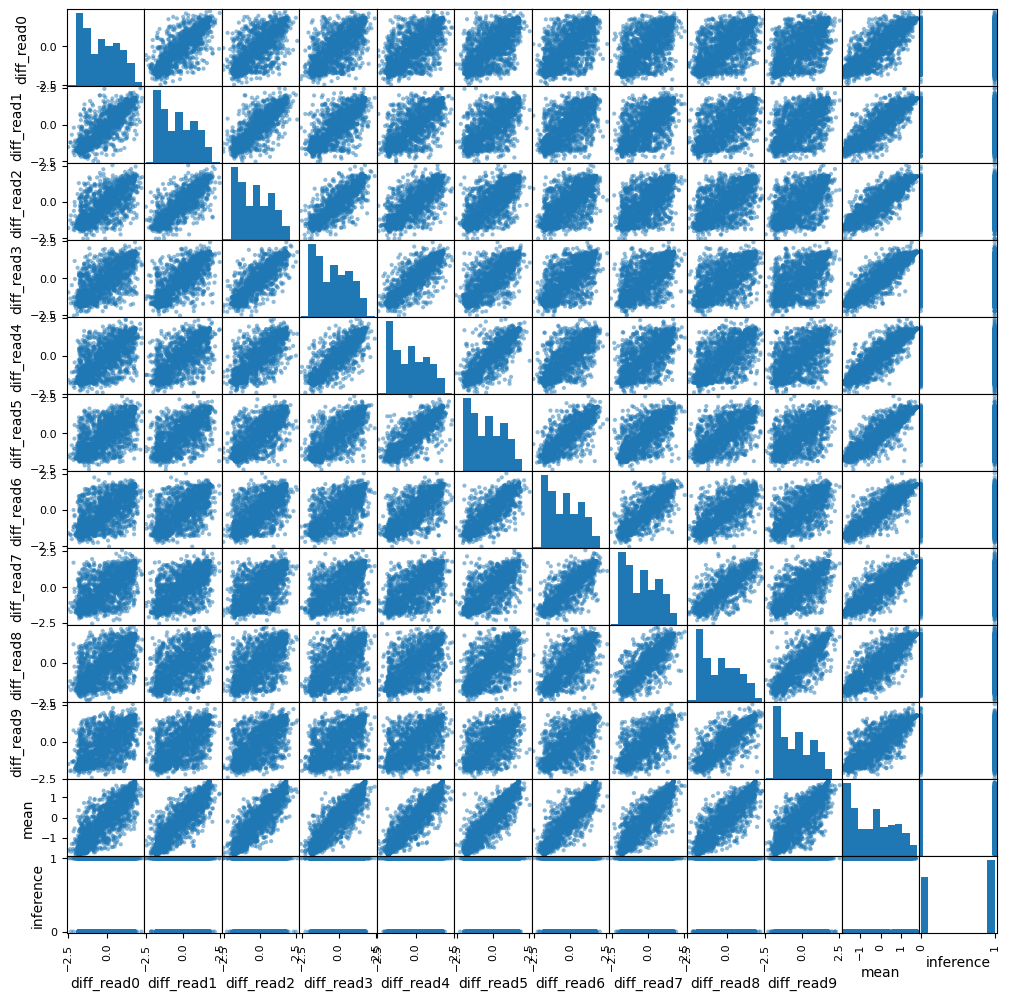

In [10]:
### Transform each cell to difference between t_end and t_start
df_for_models = df_float_list.copy()

df_for_models = df_for_models.apply(lambda x: x.apply(lambda y: y[1] - y[0]))
df_for_models['mean'] = df_for_models.iloc[:, :10].mean(axis=1)
# change column names: read0 -> diff_read0
df_for_models.columns = df_for_models.columns.str.replace('read', 'diff_read')
df_for_models['start_timestamp'] = df_raw['start_timestamp']
df_for_models['end_timestamp'] = df_raw['end_timestamp']
df_for_models['diff_timestemp'] = df_for_models['end_timestamp'] - df_for_models['start_timestamp']
df_for_models['inference'] = df_raw['inference']

df_for_models = df_for_models.drop(columns=['start_timestamp', 'end_timestamp', 'diff_timestemp'], axis=1)

# summary of dataset
display(df_for_models)
df_for_models.describe()
display(df_for_models.corr())
scatter_matrix(df_for_models, figsize=(12, 12))
plt.show()


### Using PyCaret

In [11]:
# from pycaret.classification import *
# # init setup 1
# from pycaret.classification import ClassificationExperiment
#
# exp1 = ClassificationExperiment()
# exp1.setup(df_for_model, target = 'inference', session_id = 123)
#
# # compare models init 1
# best = exp1.compare_models()

In [12]:
# leaderboard_exp1 = exp1.get_leaderboard()

## Classification Methodology 1 (Traditional Machine Learning Methods)

### Packages

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

### Functions

In [14]:
def evaluateModels(X_train, y_train, models, n_splits):
    print(f"{n_splits}-Fold Cross validation")
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f"{name}: Mean Accuracy={cv_results.mean():.5f}, Standard Deviation={cv_results.std():.5f}")

### Preparing dataset (split, scaling and numpy array conversion)

In [15]:
# Separete features and labels
df_m1 = df_for_models.copy()
m1_array = df_m1.values
X = m1_array[:, :-1]
y = m1_array[:, -1]

In [16]:
# normalize features
ss = MinMaxScaler()
X = ss.fit_transform(X)

In [17]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Tuning Models before compare

#### Logistic Regression

In [18]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression(max_iter=10000, multi_class='ovr')
clf = model_selection.GridSearchCV(logreg,  # model
                                   param_grid=parameters,  # hyperparameters
                                   scoring='accuracy',  # metric for scoring
                                   cv=10)

clf.fit(X_train, y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.565789606521794


C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-pack

#### SVM

In [19]:
# tuning models
# parameters = [
#     {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#     {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]
# svm = SVC()
# clf = model_selection.GridSearchCV(svm,
#                                    param_grid=parameters,
#                                    scoring='accuracy',
#                                    cv=10)
#
# clf.fit(X_train, y_train)
# print("Tuned Hyperparameters :", clf.best_params_)
# print("Accuracy :", clf.best_score_)

#### KNN

In [20]:
# gridsearch for KNN
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
clf = model_selection.GridSearchCV(knn,
                                   param_grid=parameters,
                                   scoring='accuracy',
                                   cv=10)

clf.fit(X_train, y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy : 0.724758335226269


#### Naive Bayes

In [21]:
# gridsearch for Naive Bayes
parameters = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'fit_prior': [True, False]
}

nb = MultinomialNB()
clf = model_selection.GridSearchCV(nb,
                                   param_grid=parameters,
                                   scoring='accuracy',
                                   cv=10)
clf.fit(X_train, y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'alpha': 0.1, 'fit_prior': True}
Accuracy : 0.565789606521794


### Compare Models using 10-fold cross validation

In [22]:
# models = []
#
# models.append(('LR', LogisticRegression(max_iter=10000, multi_class='ovr', C=0.001, penalty='l2', solver='newton-cg')))
# models.append(('SVM', SVC(C=1, kernel='linear')))
# models.append(('KNN', KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')))
# models.append(('NB', MultinomialNB(alpha=0.1, fit_prior=True)))
#
# evaluateModels(X_train, y_train, models, 10)

### Predictions with best model

In [23]:
best_model = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       305
         1.0       0.79      0.65      0.72       398

    accuracy                           0.71       703
   macro avg       0.71      0.72      0.71       703
weighted avg       0.72      0.71      0.71       703



## Classification Methodology 2 (Artificial Neural Networks) (LSTM)

### Packages

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input
from keras.losses import BinaryCrossentropy

from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

### Functions

### Preparing dataset (split, scaling and numpy array conversion)

In [25]:
# Separete features and labels
df_m2 = df_for_models.copy()
df_m2.drop(columns=['mean'], inplace=True)
m2_array = df_m2.values
X = m2_array[:, :-1]
y = m2_array[:, -1]

In [26]:
X_train.shape[1]

11

In [27]:
# normalize features
ss = MinMaxScaler(feature_range=(0, 1))
X = ss.fit_transform(X)

In [28]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=52)  # 80% train

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=52)  # 10% val, 10% testc

In [29]:
# convert X_train to LSTM model input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

In [30]:
X_val.shape[0]

351

In [31]:
X_train.shape[1:]

(1, 10)

### LSTM Declaration

In [32]:


# create the model

model = Sequential()
model.add(Input(shape= X_train.shape[1:], name='input'))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               273408    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 306,433
Trainable params: 306,433
Non-trainable params: 0
_________________________________________________________________
None


### LSTM Training

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
88/88 [==============================] - 4s 17ms/step - loss: 0.6860 - accuracy: 0.5629 - val_loss: 0.6817 - val_accuracy: 0.5812
Epoch 2/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6832 - accuracy: 0.5651 - val_loss: 0.6734 - val_accuracy: 0.5812
Epoch 3/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6650 - accuracy: 0.5651 - val_loss: 0.6368 - val_accuracy: 0.5812
Epoch 4/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6273 - accuracy: 0.5896 - val_loss: 0.6197 - val_accuracy: 0.7436
Epoch 5/50
88/88 [==============================] - 1s 10ms/step - loss: 0.6116 - accuracy: 0.6995 - val_loss: 0.6193 - val_accuracy: 0.7265
Epoch 6/50
88/88 [==============================] - 1s 11ms/step - loss: 0.6034 - accuracy: 0.7248 - val_loss: 0.6137 - val_accuracy: 0.7151
Epoch 7/50
88/88 [==============================] - 1s 10ms/step - loss: 0.5983 - accuracy: 0.7297 - val_loss: 0.6167 - val_accuracy: 0.7066
Epoch 8/50
88/88

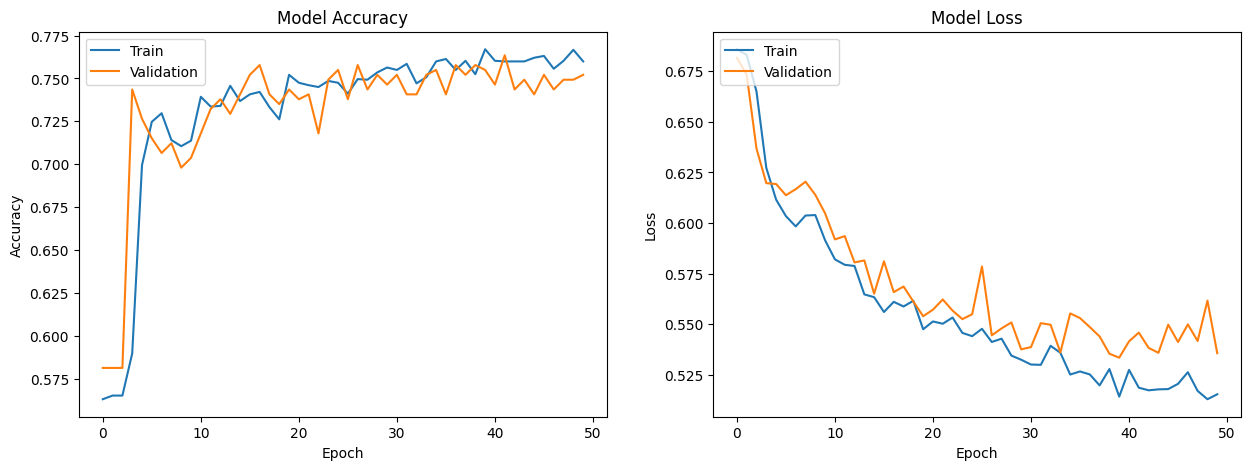

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### LSTM Evaluation

In [36]:
# Final evaluation of the model
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Accuracy: 78.69%


In [27]:
# df = df.apply(lambda x: x.apply(lambda y: y[1] - y[0]))
# df.columns = df.columns.str.replace('read', 'diff_read')
# df['mean'] = df.iloc[:, :10].mean(axis=1)


In [28]:
# df.to_csv('df.csv', index=False)